In [1]:
import matplotlib.pyplot as plt
import matplotlib
import models

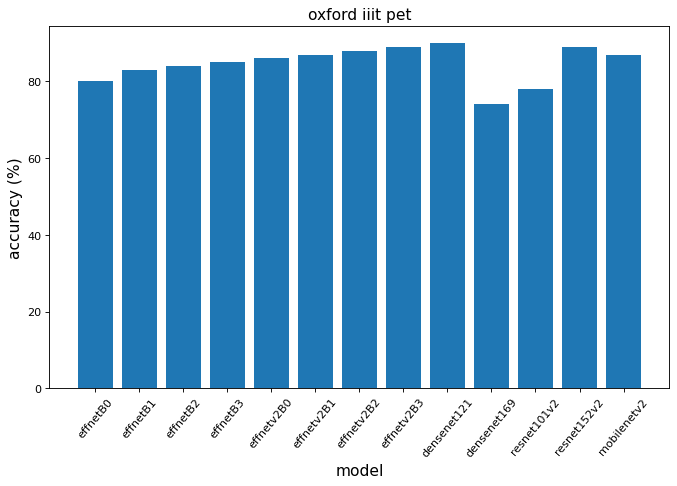

In [9]:
model_names = models.get_supported_backbones()
accuracy = [80, 83, 84, 85, 86, 87, 88, 89, 90, 74, 78, 89, 87]

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(model_names, accuracy)
plt.xticks(rotation='50')
plt.title('oxford iiit pet', fontsize=14)
plt.xlabel('model', fontsize=14)
plt.ylabel('accuracy (%)', fontsize=14)
plt.show()

table model name | params | accuracy1 | accuracy2 | accuracy3 | average training time

plt accuracy, params

plt accuracy, training time

plt accuracy, flops

In [2]:
import matplotlib.pyplot as plt
import models
import math
import numpy as np
import cv2
import json

In [35]:
def sigmoid(x):
    return 1/(1+math.e**(-x))

def tanH(x):
    return 2*sigmoid(2*x) - 1

def ReLu(x):
    return np.maximum(0, x)

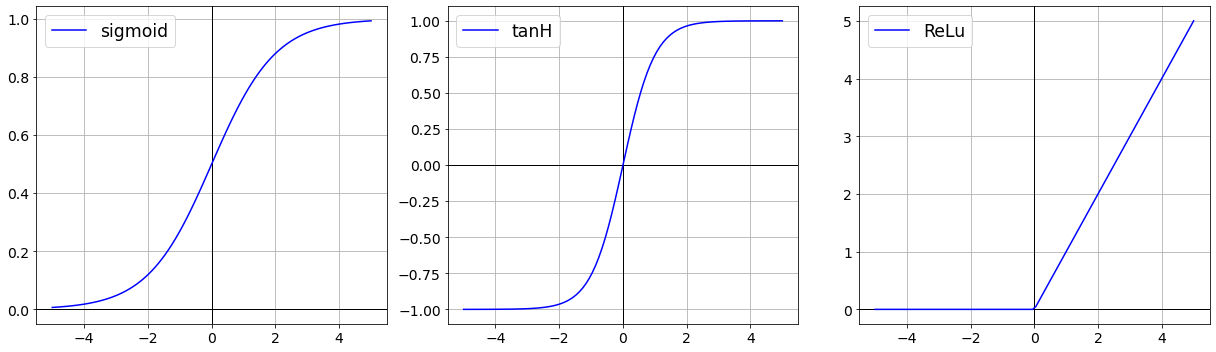

In [36]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(17, 5))

s = sigmoid(x)
plt.subplot(1, 3, 1)
plt.grid()
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x,s, 'b', label="sigmoid")
plt.legend(fontsize='xx-large')

t = tanH(x)
plt.subplot(1, 3, 2)
plt.grid()
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x,t, 'b', label="tanH")
plt.legend(fontsize='xx-large')

r = ReLu(x)
plt.subplot(1, 3, 3)
plt.grid()
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x,r, 'b', label="ReLu")
plt.legend(fontsize='xx-large')


plt.show()

In [9]:
image = cv2.imread('../dokumentacija/slike/fer.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.array( [[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
result = cv2.filter2D(image_gray, -1, kernel)

In [11]:
cv2.imwrite('../dokumentacija/slike/fer_gray.jpg', image_gray)
cv2.imwrite('../dokumentacija/slike/fer_filtered.jpg', result)
cv2.imshow('../dokumentacija/slike/fer_filtered.jpg', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
with open("./best_models_log/oxford_iiit_pet/evaluate.txt", "r") as file:
    pets_stats = json.load(file)
    
with open("./best_models_log/oxford_flowers102/evaluate.txt", "r") as file:
    flowers_stats = json.load(file)
    
with open("./best_models_log/uc_merced/evaluate.txt", "r") as file:
    uc_stats = json.load(file)

In [3]:
def get_arrays(stats):
    accuracy = np.array([])
    parameters = np.array([])
    flops = np.array([])
    labels = np.array([])
    for backbone_name, dict_values in stats.items():
        accuracy = np.append( accuracy, dict_values["accuracy"])
        parameters = np.append( parameters, dict_values["parameters"])
        flops = np.append( flops, dict_values["flops"])
        labels = np.append( labels, backbone_name)
        
    accuracy = accuracy * 100
    parameters = parameters / 1_000_000
    flops = flops / 1_000_000_000
    
    return accuracy, parameters, flops, labels

# params - accuracy graphs

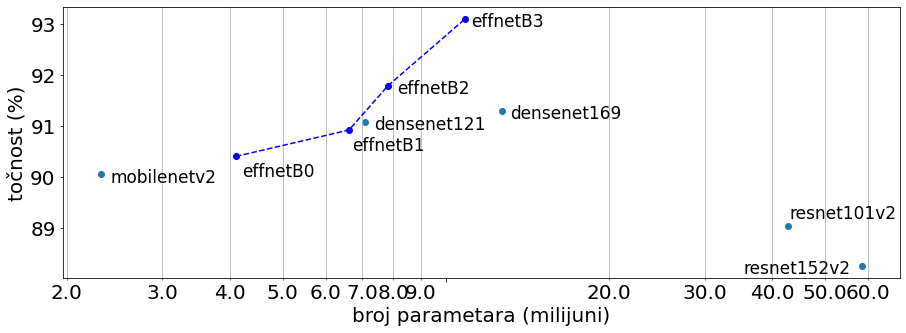

In [30]:
accuracy, parameters, flops, labels = get_arrays(pets_stats)

plt.figure(figsize=(15, 5))
plt.plot(parameters[0:4], accuracy[0:4], "ob--")
plt.scatter(parameters[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (parameters[i]+0.1, accuracy[i]-0.4), fontsize=17)
i = 1; plt.annotate("effnetB1", (parameters[i]+0.1, accuracy[i]-0.4), fontsize=17)
i = 2; plt.annotate("effnetB2", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 3; plt.annotate("effnetB3", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 5; plt.annotate("densenet169", (parameters[i]+0.4, accuracy[i]-0.15), fontsize=17)
i = 6; plt.annotate("resnet101v2", (parameters[i]+0.3, accuracy[i]+0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (parameters[i]-23, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (parameters[i]+0.1, accuracy[i]-0.15), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj parametara (milijuni)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/pets_params_acc.png', bbox_inches='tight')
plt.show()

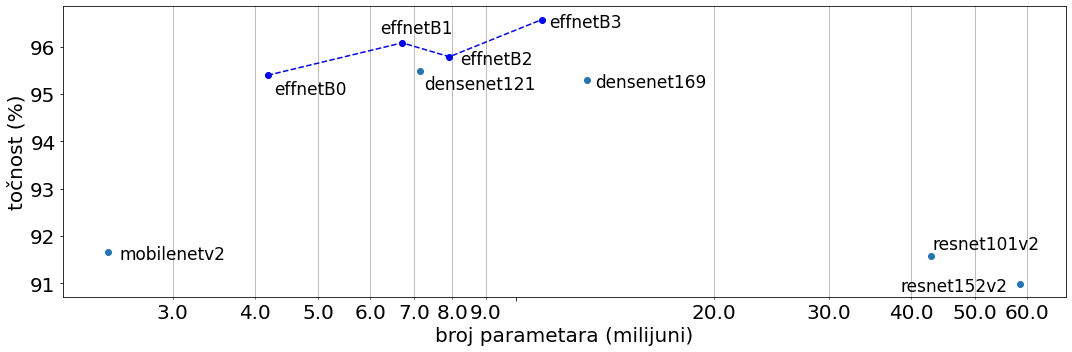

In [41]:
accuracy, parameters, flops, labels = get_arrays(flowers_stats)
plt.rcParams["figure.autolayout"] = True
font_size = 13
plt.figure(figsize=(15, 5))
plt.plot(parameters[0:4], accuracy[0:4], "ob--")
plt.scatter(parameters[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (parameters[i]+0.1, accuracy[i]-0.4), fontsize=17)
i = 1; plt.annotate("effnetB1", (parameters[i]-0.5, accuracy[i]+0.2), fontsize=17)
i = 2; plt.annotate("effnetB2", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 3; plt.annotate("effnetB3", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (parameters[i]+0.1, accuracy[i]-0.4), fontsize=17)
i = 5; plt.annotate("densenet169", (parameters[i]+0.4, accuracy[i]-0.15), fontsize=17)
i = 6; plt.annotate("resnet101v2", (parameters[i]+0.3, accuracy[i]+0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (parameters[i]-20, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (parameters[i]+0.1, accuracy[i]-0.15), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj parametara (milijuni)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/flowers_params_acc.png', bbox_inches='tight')
plt.show()

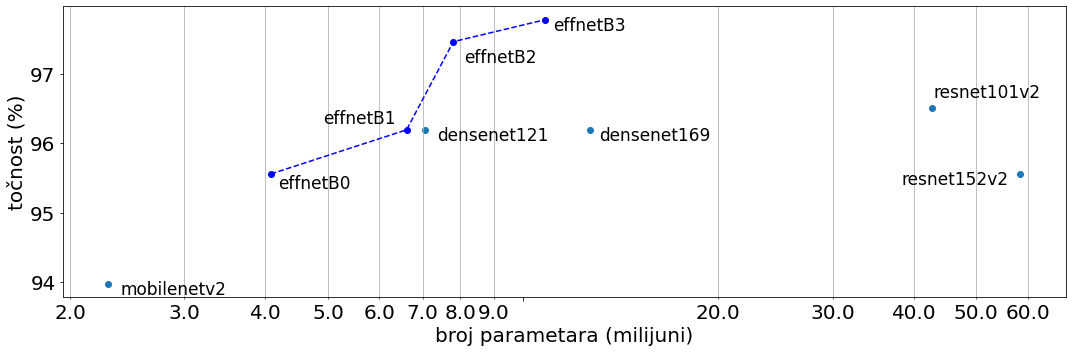

In [53]:
accuracy, parameters, flops, labels = get_arrays(uc_stats)
plt.rcParams["figure.autolayout"] = True
font_size = 13
plt.figure(figsize=(15, 5))
plt.plot(parameters[0:4], accuracy[0:4], "ob--")
plt.scatter(parameters[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (parameters[i]+0.1, accuracy[i]-0.2), fontsize=17)
i = 1; plt.annotate("effnetB1", (parameters[i]-1.7, accuracy[i]+0.1), fontsize=17)
i = 2; plt.annotate("effnetB2", (parameters[i]+0.3, accuracy[i]-0.3), fontsize=17)
i = 3; plt.annotate("effnetB3", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (parameters[i]+0.3, accuracy[i]-0.15), fontsize=17)
i = 5; plt.annotate("densenet169", (parameters[i]+0.4, accuracy[i]-0.15), fontsize=17)
i = 6; plt.annotate("resnet101v2", (parameters[i]+0.3, accuracy[i]+0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (parameters[i]-20, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (parameters[i]+0.1, accuracy[i]-0.15), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj parametara (milijuni)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/uc_merced_params_acc.png', bbox_inches='tight')
plt.show()

# flops - accuracy graph

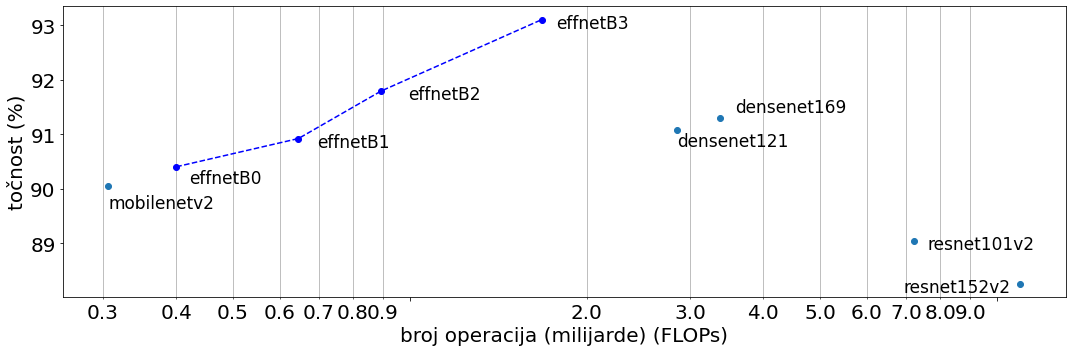

In [18]:
accuracy, parameters, flops, labels = get_arrays(pets_stats)
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(15, 5))
plt.plot(flops[0:4], accuracy[0:4], "ob--")
plt.scatter(flops[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (flops[i]+0.02, accuracy[i]-0.3), fontsize=17)
i = 1; plt.annotate("effnetB1", (flops[i]+0.05, accuracy[i]-0.15), fontsize=17)
i = 2; plt.annotate("effnetB2", (flops[i]+0.1, accuracy[i]-0.15), fontsize=17)
i = 3; plt.annotate("effnetB3", (flops[i]+0.1, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (flops[i], accuracy[i]-0.3), fontsize=17)
i = 5; plt.annotate("densenet169", (flops[i]+0.2, accuracy[i]+0.1), fontsize=17)
i = 6; plt.annotate("resnet101v2", (flops[i]+0.4, accuracy[i]-0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (flops[i]-4, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (flops[i], accuracy[i]-0.4), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj operacija (milijarde) (FLOPs)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/pets_flops_acc.png', bbox_inches='tight')
plt.show()

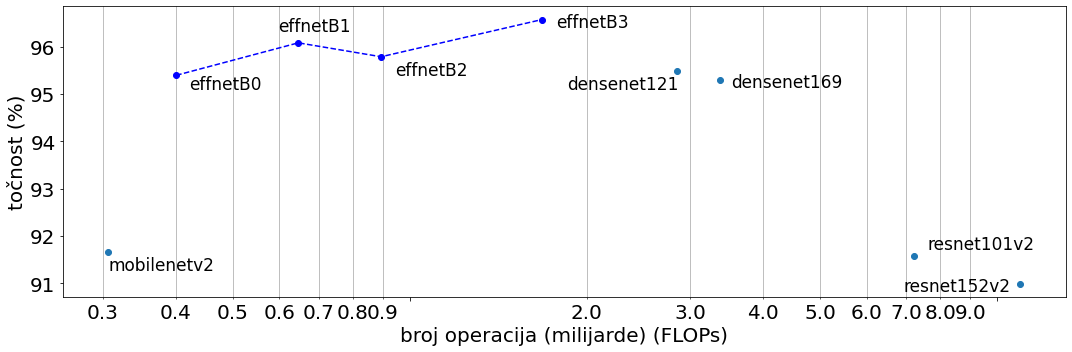

In [29]:
accuracy, parameters, flops, labels = get_arrays(flowers_stats)

plt.figure(figsize=(15, 5))
plt.plot(flops[0:4], accuracy[0:4], "ob--")
plt.scatter(flops[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (flops[i]+0.02, accuracy[i]-0.3), fontsize=17)
i = 1; plt.annotate("effnetB1", (flops[i]-0.05, accuracy[i]+0.25), fontsize=17)
i = 2; plt.annotate("effnetB2", (flops[i]+0.05, accuracy[i]-0.4), fontsize=17)
i = 3; plt.annotate("effnetB3", (flops[i]+0.1, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (flops[i]-1, accuracy[i]-0.4), fontsize=17)
i = 5; plt.annotate("densenet169", (flops[i]+0.15, accuracy[i]-0.15), fontsize=17)
i = 6; plt.annotate("resnet101v2", (flops[i]+0.4, accuracy[i]+0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (flops[i]-4, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (flops[i], accuracy[i]-0.4), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj operacija (milijarde) (FLOPs)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/flowers_flops_acc.png', bbox_inches='tight')
plt.show()

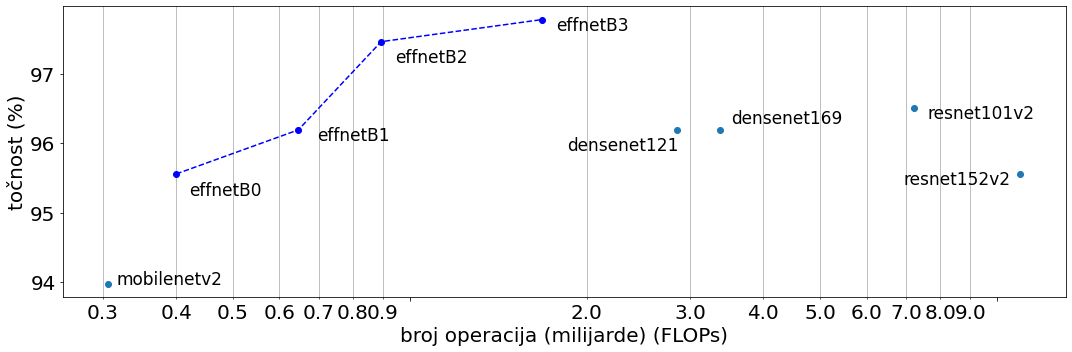

In [34]:
accuracy, parameters, flops, labels = get_arrays(uc_stats)

plt.figure(figsize=(15, 5))
plt.plot(flops[0:4], accuracy[0:4], "ob--")
plt.scatter(flops[4:], accuracy[4:])

i = 0; plt.annotate("effnetB0", (flops[i]+0.02, accuracy[i]-0.3), fontsize=17)
i = 1; plt.annotate("effnetB1", (flops[i]+0.05, accuracy[i]-0.15), fontsize=17)
i = 2; plt.annotate("effnetB2", (flops[i]+0.05, accuracy[i]-0.3), fontsize=17)
i = 3; plt.annotate("effnetB3", (flops[i]+0.1, accuracy[i]-0.15), fontsize=17)
i = 4; plt.annotate("densenet121", (flops[i]-1, accuracy[i]-0.3), fontsize=17)
i = 5; plt.annotate("densenet169", (flops[i]+0.15, accuracy[i]+0.1), fontsize=17)
i = 6; plt.annotate("resnet101v2", (flops[i]+0.4, accuracy[i]-0.15), fontsize=17)
i = 7; plt.annotate("resnet152v2", (flops[i]-4, accuracy[i]-0.15), fontsize=17)
i = 8; plt.annotate("mobilenetv2", (flops[i]+0.01, accuracy[i]), fontsize=17)

ax = plt.gca()
ax.set_xscale('log')
plt.gca().xaxis.set_major_formatter( matplotlib.ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter( matplotlib.ticker.FormatStrFormatter("%.1f"))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(axis='x', which='minor')
plt.xlabel("broj operacija (milijarde) (FLOPs)", fontsize=20)
plt.ylabel("točnost (%)", fontsize=20)
plt.savefig('../dokumentacija/slike/uc_merced_flops_acc.png', bbox_inches='tight')
plt.show()